Title blocks and credits

Inspiration

The topic was decided on as both members of Team Gamma (David Baltazar and Diego Ortiz) are 
involved with simulations in our careers. While we both specialize in different fields (David i 
Thermal, Shock, and Vibration, and Diego in Fluid Dynamics and Aerodynamics), both of o r
companies have sought the need for active cooling heatsinks at some point - and are seeing  he
potential need for it in the future. The program we wanted to develop was something that could  elp
us conduct thermal analyses on various types of active heatsinks (like heat pumps or fans), an  see
the effects they have on our systems. While the Python simulation might not be the most accur te in
terms of the assumptions and boundary conditions we intend to set on it, we intend to use  t more
for getting general ideas on how complex or big or expensive a cooling system will be - which w ll help
put into perspective the feasibility of an idea during the initial design phase. As we both spec alize in
simulations, setting up accurate/realistic simulations is time-consuming and tiring - whic  is where
having a quick and easy script like the one we are proposing will best be used; so that we can get
general ideas of whether or not a system will work before committing hors into it.


Main Functions

For this project, we will be conduting a thermal analysis on a PCB board when under the effects of different types of heatsinks. 

Diego's part for heatsinks

For the PCB end, the effective thermal conductivity, specific heats, and densities will be calculated using thermal resistance networks and overall conductance methods. This will be done through class methods created in this script, which will help faciliate the inputs for the main thermal simulation library, heatrapy. From there, electrical components with significant heat dissipation will be modeled into the 2-D simulation using special class methods made in this script, and with heatrapy functions. Once all of these are established, a transient thermal analysis will be conducted to calculate the temperatures of each of the components and a temperature of the board will be displayed. 

Problem Statement

*** Diego, please find a way to implement your part in this

As an example of how this code works, we will use it to find out what the hottest temperatures are of the components of a PCB board. In this example, we have a 4'' x 6'' PCB board made up of 2 layers of .0028'' thick Cu, 2 layers of .004'' thick VT-5A2 insulative material, and 1 layer of .062'' thick Al-Clad as the base layer. For the components, a preliminary power analysis was performed previously by an electrical engineer to find that the following components have the highest heat dissipation to them:

    2 FETs (one at 
    2 Transformers (CAT6243 from Onsemi)
    2 Inductors (DMN3020UTS by Diodes Inc)
    1 Common Mode Choke (SCF47X-200-S1R8B011JH by Kemet)
    
The duty cycle of the PCB board is to run for 2 minutes under the conditions of the power analysis before resting and cooling off for another 10 minutes. It can be assumed that the heatsink is ran constantly so the board can be considered to be at the cooled ambient temperature of 27 C (or 300 K) at the start of each duty cycle. The PCBA will also be operating in a sealed environment, so convection effects on the PCB side will be neglected as a conservative approach to the analysis. Radiation effects are also negligible at this time. 

Given the operation and duty cycle of the system, we are looking to see what the maximum temperaturs of each of the critical components mentioned will be - which will be at the end of the duty cycle (i.e. 2 minutes) since the components will be operating a constant load. We not only need to consider the inherent temperature rises the components experience from its electrical load, but also the temperature rises from thermal spreading of the board through conduction.
*** PCB System

Structure

The analysis is broken up into XXXXXXX main sections:
    Requirements
    ***Diego's stuff
    PCB Property Calculation
    Electrical Component Modeling
    Thermal Simulation
    Results

Requirements

heatrapy introudction

The heatrapy library is needed to run this script. The heatrapy module is used to do the actual thermal analysis and this script creates many classes and functions to facilitate the inputs for the heatrapy simulation

maybe Diego can do?
Maybe move down to the 'Thermal Simulation' section?

The following block imports all the necessary libraries needed to run this analysis.

Figure out how to fix this directory thing

In [1]:
import os

# Imports heatrapy simulation
os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')
import heatrapy as htp

Diego's section for heatsinks

PCB Property Calculation

PCB's are laminates of different materials. With each material having their own thermal conductivities, the combined conductivity of the PCB can be calculated using the overall thermal conductance method.
**Board orientation

PCB_Layer Class Method

When doing FEA analyses, the geometry of each part plays a major part in meshing. In general, slender geometries (long and thin) result in high number of elements when creating the mesh, which can lead to singularities that don't give realistic results, or lead to long computation times because of all the elements that need calculating. PCB boards already have a slender shape to them since they are typically wider and longer than they are thick - and it gets even worse with the fact that PCBs are laminated layers of different materials. The best way to treat PCB boards is to treat all the layers as one single material (instead of multiple thin layers) in order to save a mesh from going overboard. However to do this, overall thermal properties of the board will need to be re-calculated to ensure realistic results.
**Sierra Circuits pic

To calculate the overall conductance of the board, the geometry and thermal properties of each layer must be defined. The class method, PCB_Layer(), takes in the geometry of the layer (length (m), width (m), and thickness(m)) and the isotropic thermal conductivity values (k (W/mK) in the x-, y-, and z-direction) to build the thermal resistance network. 
**Units for the input

The density, rho, and the specific heat, cp, are also taken as inputs to be used when calculating the overall properties of the entire board. There is also an additional input where you can specify how many layers of the material there are in the board. PCBs commonly have multiple layers of the same material (typically Copper and some insulative material) in alternating pattern. However, to calculate the overall thermal conductivity of the board, the exact positon of each layer does not need to be defined - but rather how many layers there are of it. 

From there, the thermal resitance of the layer can be calculated. For the thermal resistance in the normal direction (ie going through the board), this is calculated in series - much like how the heat is going through layer after layer. The thermal resistance in the transverse direction (ie along the width and length of the board), this is calculated in parallel since the heat is going through all of the laminate layers at once. 
**Thermal Resistance Network

The PCB_Layer() class method has built-in functions inside of it to calculate these thermal resistances.
    total_z        Calculates overall thickness of all the layers
    total_mass     Calculates overall mass of all the layers
    resist_x       Calculates overall thermal resistance in x-dir (transverse) of all the layers
    resist_y       Calculates overall thermal resistance in y-dir (transverse) of all the layers
    resist_z       Calculates overall thermal resistance in z-dir (normal) of all the layers

In [2]:
# Class for storing layer properties
# Units are as follows: PCB_Layer(length=m, width=m, thk=m, cond_x=W/mK, cond_y=W/mK, cond_z=W/mK, rho=kg/m3, cp=J/kgK, layers=-)
class PCB_Layer:
    def __init__(self, length, width, thk, cond_x, cond_y, cond_z, rho, cp, layers):
        self.length = length
        self.width = width
        self.thk =  thk
        self.cond_x = cond_x
        self.cond_y = cond_y
        self.cond_z = cond_z
        self.layers = layers
        self.rho = rho
        self.cp = cp

    def resist_x(abc):
        # Note this is the reciprocal
        a_cs_x = abc.length * abc.thk
        R_x = (abc.layers * abc.width) / (abc.cond_x * a_cs_x)
        return R_x

    def resist_y(abc):
        # Note this is the reciprocal
        a_cs_y = abc.width * abc.thk
        R_y = (abc.layers * abc.length) / (abc.cond_y * a_cs_y)
        return R_y

    def resist_z(abc):
        a_cs_z = abc.width * abc.length
        R_z = (abc.layers * abc.thk) / (abc.cond_z * a_cs_z)
        return R_z

    def total_z(abc):
        z_total = abc.thk * abc.layers
        return z_total

    def total_mass(abc):
        Volume_layer = abc.width * abc.length * abc.thk
        Mass_layer = Volume_layer * abc.layers * abc.rho
        return Mass_layer

The next class requires the input of a list of materials made using the PCB_Layer() class.

From there, the overall thermal resistance is extracted from each material in the list. The thermal resistances are then summed up and used to calculate the overall thermal conductivity of the PCB board. The PCB board is then treated as a single homogenous body, whose thickness is the combined thicknesses of each layer, and its length and width are the same shape as the rest of its layers. The isotropic thermal conductivities of the PCB board can then be calculated as follows.
**Thermal Conductivity Calc

There is also another function inside of the class that allows for calculation of specific heat and density of the overall board. These values are calculated using volumetric proportionality.

The Overall() class method has built-in functions inside of it to calculate the overall thermal conductivities.
    conductivity_x       Calculates overall thermal conductivity in x-dir (transverse)
    conductivity_y       Calculates overall thermal conductivity in y-dir (transverse)
    conductivity_z       Calculates overall thermal conductivity in z-dir (normal)
    density_all          Calculates overall density
    cp_all               Calculates overall specific heat capacity

In [3]:
# Class for calculating overall conductivity via overall conductance
# Input is a list of materials that are made with the 'PCB_Layer' class
class Overall:
    def __init__(self, list):
        self.list = list

    def conductivity_x(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        R_x_sum = 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
            
            R_x_sum += (1/(laminate.resist_x()))
        
        R_x_overall = 1/R_x_sum
        k_x_overall = max_x / (R_x_overall * (thk_overall*max_y))

        return k_x_overall


    def conductivity_y(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        R_y_sum = 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
    
            R_y_sum += (1/(laminate.resist_y()))

        R_y_overall = 1/R_y_sum
        k_y_overall = max_y / (R_y_overall * (max_x*thk_overall))

        return k_y_overall


    def conductivity_z(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        R_z_overall = 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
    
            R_z_overall += laminate.resist_z()

        k_z_overall = thk_overall / (R_z_overall * (max_x*max_y))

        return k_z_overall

    def density_all(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        total_mass, total_density = 0, 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
            total_mass += laminate.total_mass()

        total_density = total_mass / (thk_overall*max_x*max_y)

        return total_density

    def cp_all(Layer_Materials):
        size_check_x, size_check_y = [], []
        thk_overall, max_x, max_y = 0, 0, 0
        total_cp, total_mass, total_volume = 0, 0, 0

        for laminate in Layer_Materials:
            thk_overall += laminate.total_z()
            size_check_x.append(laminate.width)
            max_x = max(size_check_x)
            size_check_y.append(laminate.length)
            max_y = max(size_check_y)
            total_mass += laminate.total_mass()
        
        for laminate_2 in Layer_Materials:
            total_cp += laminate_2.cp * (laminate_2.total_mass() / total_mass)

        return total_cp

Material Creation

With the isotropic thermal properties of the PCB board calculated, a new material needs to be added into the heatrapy simulation's mterial database to use in the thermal calculations. 

The following class method Material_Creation() takes in values for the thermal conductivities, density, and specific heat, and creates a new material called "PCB_material" inside of the heatrapy material databse. The functions inside of this class simply overwrite the existing material properties of the existing 'PCB_Material' material.

NOTE: Absolute path directory for the material databases needs to be updated on a user-basis.

In [4]:
class Material_Creation:
    def __init__(self, k, rho, cp):
        self.k   = k
        self.rho = rho
        self.cp  = cp

    def cond_change(abc):
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy\database\PCB_Material')

        # For the '0' type
        with open('k0.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.k
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('k0.txt', 'w') as file:
            file.write(filedata)

        # For the 'a' type
        with open('ka.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.k
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('ka.txt', 'w') as file:
            file.write(filedata)
        
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')

    def density_change(abc):
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy\database\PCB_Material')

        # For the '0' type
        with open('rho0.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.rho
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('rho0.txt', 'w') as file:
            file.write(filedata)

        # For the 'a' type
        with open('rhoa.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.rho
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('rhoa.txt', 'w') as file:
            file.write(filedata)
        
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')

    def cp_change(abc):
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master\heatrapy\database\PCB_Material')

        # For the '0' type
        with open('cp0.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.cp
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('cp0.txt', 'w') as file:
            file.write(filedata)

        # For the 'a' type
        with open('cpa.txt', 'r') as file:
            filedata = file.read()
            for line in filedata:
                words = filedata.split()
            old_data = words[1]

        k_x = abc.cp
        new_data = str(k_x)
        filedata = filedata.replace(old_data, new_data)

        with open('cpa.txt', 'w') as file:
            file.write(filedata)
        
        os.chdir(r'C:\Users\DBaltazar\Desktop\JUPYTER - Python\heatrapy-master')

Putting it into Practice

From the problem stated initially, we are conducting a thermal analysis on a PCB board to see the effects of different heatsink systems to attach to it. 

The PCB Board

The PCB in question is made up of 3 materials: Aluminum, Copper, and VT-5A2. The PCB board is Al-clad, meaning the bottom layer of the board is a piece of Aluminum. This is advantageous to do if the PCB is expected to house high power dissipating electrical components since the added Al layer increases the overall thermal conductivity of the board with how thermal resistances are set up. The copper layers serve as the trace layers for the electrical signals to travel throughout the board, and the VT-5A2 is a commerical PCB insulation material that separates the electrical signal layers from each other. 
**PCB Stack-up

Each of these layers are put into the simulation using the PCB_Layer() class function. In this particular case, all the layers are the same length and width - but their thicknesses do differ. The thermal conductivities of each material (notice how the VT-5A2 has different conductivies in the x- and y- direction than its z-direction) are also input into the system. (Below is a snapshot of the datasheet for VT-5A2 showing the different thermal conductivities in the different directions)
**VT-5A2 conductivities

Then once each layer is made in the analysis, this list of materials is stored in a list - which will then become the input for the Overall() class methods.

In [5]:
# Define Materials using the 'Layer' class
# Units are as follows: PCB_Layer(length=m, width=m, thk=m, cond_x=W/mK, cond_y=W/mK, cond_z=W/mK, layers=-)
Cu   = PCB_Layer(length=0.1016, width=0.1524, thk=0.00007112, cond_x=334.400, cond_y=334.400, cond_z=334.400, rho=8933, cp=385,  layers=2)
VT   = PCB_Layer(length=0.1016, width=0.1524, thk=0.00010160, cond_x=2.200,   cond_y=2.200,   cond_z=3.400,   rho=2200, cp=1100, layers=2)
Al   = PCB_Layer(length=0.1016, width=0.1524, thk=0.00157480, cond_x=167.0,   cond_y=167.0,   cond_z=167.0,   rho=2700, cp=910,  layers=1)

# Stores all layer info in a list
Layer_Materials = [Cu, VT, Al]

The overall isotropic thermal conductivities, density, and specific heats are then calculated using the Overall() class methods, with are assigned to a variable for use later on.

In [6]:
# Calculate Overall Conductivities using the 'Conductance' class methods
PCB_k_x = Overall.conductivity_x(Layer_Materials)
PCB_k_y = Overall.conductivity_y(Layer_Materials)
PCB_k_z = Overall.conductivity_z(Layer_Materials)
PCB_cp  = Overall.cp_all(Layer_Materials)
PCB_rho = Overall.density_all(Layer_Materials)

print("k_x is " + str(round(PCB_k_x,4)) + " W/mK")
print("k_y is " + str(round(PCB_k_y,4)) + " W/mK")
print("k_z is " + str(round(PCB_k_z,4)) + " W/mK")
print("cp is " + str(round(PCB_cp,4)) + " J/kgK")
print("Density is " + str(round(PCB_rho,4)) + " kg/m^3")

k_x is 143.2085 W/mK
k_y is 143.2085 W/mK
k_z is 27.5817 W/mK
cp is 812.4825 J/kgK
Density is 3108.7937 kg/m^3


With the new thermal properties calculated, these values are then assigned to a new material via the Material_Creation() class methods.

In [7]:
PCB_Material = Material_Creation(round(PCB_k_x), round(PCB_rho), round(PCB_cp))

PCB_Material.cond_change()
PCB_Material.density_change()
PCB_Material.cp_change()

Electrical Component Modeling

With the PCB now created, the next step is to add the electrical components since they not only serve as the main heat sources for the simulation, but are also the targets of interest for the analysis. 
**Components Accentuated - iso and top-down

Due to how heatrapy works, a 2D thermal analysis will be created. In this case, the electrical components will be modeled on the PCB with the pad geometries of the component's electrical leads. 
**Pad geometries

Two new classes were made - PCB_Comp_sqr() and PCB_Comp_cir() - that will help facilitate the integration of these components into heatrapy. They mainly take in the geometry and position of the components and its estimated power dissipation. 
**Inputs for PCB

The first two inputs of the PCB_Comp_sqr() class - bl_x and bl_y - are the global positions of the bottom-left corner of the component's lead pads. The next two inputs - width and height - are simply the width and heights of the pad, and taken from the component's datasheet. The 'ori' input serves as the orientation of the component with a value of "1" being vertical (where the longest length of the pad is along the global y-dir) and a value of "0" being horizontal (where the longest length of the pad is in the global x-dir).A similar approach is done for the PCB_Comp_cir() class method.

With these inputs, the class automatically calculates the required inputs needed from heatrapy to integrate the electrical component in the model. 

In [8]:
# Class for Square Components
# Units are as follows: PCB_Comp_sqr(bl_x=mm, bl_y=mm, width=mm, height=mm, ori=-, power=mW)
class PCB_Comp_sqr:
    def __init__(self, bl_x, bl_y, width, height, ori, power):
        self.bl_x = bl_x
        self.bl_y = bl_y
        self.width =  width
        self.height = height
        self.ori = ori
        self.power = power

    def shape(abc):
        return 'square'
        
    def blc(abc):
        return (abc.bl_x, abc.bl_y)   

    def trc(abc):
        top_right_corner = (0, 0)
        if abc.ori == 1:
            top_right_corner = (abc.bl_x + abc.width, abc.bl_y + abc.height)
        else:
            top_right_corner = (abc.bl_x + abc.height, abc.bl_y + abc.width)
        return top_right_corner

    def length(abc):
        if abc.ori == 1:
            length_code = (abc.width, abc.height)
        else:
            length_code = (abc.height, abc.width)
        return length_code

# Class for Circular Components
# Units are as follows: PCB_Comp_cir(ctr_x=mm, ctr_y=mm, rad=mm, power=mW)
class PCB_Comp_cir:
    def __init__(self, ctr_x, ctr_y, rad, power):
        self.ctr_x = ctr_x
        self.ctr_y = ctr_y
        self.rad =  rad
        self.power = power

    def ctr(abc):
        return (abc.ctr_x, abc.ctr_y) 

    def shape(abc):
        return 'circle'

Creating the Components

A preliminary power analysis was done on the PCB beforehand and indicated that the following components had the highest power dissipation:
    2 FETs (IMBG65R048M1HXTMA1 from Infineon)
    2 Transformers (CAT6243 from Onsemi)
    2 Inductors (DMN3020UTS by Diodes Inc)
    1 Common Mode Choke (SCF47X-200-S1R8B011JH by Kemet)

Separate objects are created for each electrical lead of each component. In context of the problem, each of the components (except for the common mode choke) only have two electrical leads (and can be verified in the component's datasheet). This means that each component has two separate bodies made using the PCB_Comp_sqr() class. 
**Electrical Components

These are then saved into a list for integrating into heatrapy.

In [9]:
# Define components using PCB_Comp Class

# PCB Board Size (.01 m)
PCB_l = 11 # or 4''
PCB_w = 15 # or 6''

# FETs are IMBG65R048M1HXTMA1 from Infineon
FET_1a = PCB_Comp_sqr(bl_x=3, bl_y=3, width=1, height=1, ori=1, power=12)
FET_1b = PCB_Comp_sqr(bl_x=3, bl_y=3, width=1, height=1, ori=1, power=12)
FET_2a = PCB_Comp_sqr(bl_x=4, bl_y=3, width=1, height=1, ori=1, power=7)
FET_2b = PCB_Comp_sqr(bl_x=4, bl_y=3, width=1, height=1, ori=1, power=7)
FET_3a = PCB_Comp_sqr(bl_x=6, bl_y=3, width=1, height=1, ori=1, power=5)
FET_3b = PCB_Comp_sqr(bl_x=6, bl_y=3, width=1, height=1, ori=1, power=5)

# Transformers are CAT6243 from Onsemi
Transformer_1a = PCB_Comp_sqr(bl_x=10, bl_y=7, width=1, height=1, ori=1, power=4)
Transformer_1b = PCB_Comp_sqr(bl_x=10, bl_y=7, width=1, height=1, ori=1, power=4)
Transformer_2a = PCB_Comp_sqr(bl_x=10, bl_y=8, width=1, height=1, ori=0, power=4)
Transformer_2b = PCB_Comp_sqr(bl_x=10, bl_y=8, width=1, height=1, ori=0, power=4)

# Inductors are DMN3020UTS by Diodes Inc
Inductor_1a = PCB_Comp_sqr(bl_x=3, bl_y=8, width=1, height=1, ori=1, power=10)
Inductor_1b = PCB_Comp_sqr(bl_x=3, bl_y=8, width=1, height=1, ori=1, power=10)
Inductor_2a = PCB_Comp_sqr(bl_x=5, bl_y=8, width=1, height=1, ori=1, power=6)
Inductor_2b = PCB_Comp_sqr(bl_x=5, bl_y=8, width=1, height=1, ori=1, power=6)

# Common Mode Choke is SCF47X-200-S1R8B011JH by Kemet
Choke_1 = PCB_Comp_cir(ctr_x=10, ctr_y=3, rad=2.1, power=4)

# Store all component information in a list
Component_list = [FET_1a, FET_1b, FET_2a, FET_2b, FET_3a, FET_3b,
              Transformer_1a, Transformer_1b, Transformer_2a, Transformer_2b,
              Inductor_1a, Inductor_1b, Inductor_2a, Inductor_2b]

Thermal Simulation

Due to how the PCB is set-up, a SingleObject2D() class method from heatrapy is appropriate for the model.

In this particular case, heatrapy is running a transient analysis. The initial temeprature was specified to be 27 C (or 300 K), and the units will be in mm (but the resulting plots will show the positions in meters, m). Material properties (which is the PCB_Material that was calculated beforehand in this code) and sizing are also taken as inputs.

Heatrapy also requires boundary conditions for the edges. If there is a specific temperature the edges are held to, they would be input it in Kelvins in the 'boundaries' tuple. A value of '0', however will turn the edge specified into an insulated condition - which is a worst-case scenario for any PCB. To make this analysis conservative, we will be treating all the edges as insulated. 

Incidentally, with all the conditions we are imposing on the analysis, the PCB is essentially exposed to a vacuum since there will not be any convection cooling on any side of the board. 

In [10]:
# Initiate heatrapy simulation
Project_Example = htp.SingleObject2D(
    300,
    material='PCB_Material',
    boundaries=(0, 0, 0, 0),
    size=(PCB_w, PCB_l),
    draw=[])

Cooling Effects

DIEGO CAN CHANGE

The main goal of this analysis is to see the different effects of heatsinks have on a running PCB board. With the system layout, the PCB will be cooled from the underside of the board. This means that the entire underside of the board is experiencing a heat input -  but in the negative direction since it is being cooled. And the amount of cooling the board is experiencing is calculated from the 'HEATSINK CALCULATION' section previously. 

REMEMBER TO CHANGE THE POWER VALUE WITH THE COOLING FROM HEATSINK SECTION - PREFERRABLY A VARIABLE

Diego to write some stuff here

In [11]:
Project_Example.change_power(
    shape='square', 
    power_type='Q', 
    initial_point=(0,0), 
    final_point=(PCB_w, PCB_l),
    power=0.1)

Project_Example.change_power(
    shape='square', 
    power_type='Q0', 
    initial_point=(0,0), 
    final_point=(PCB_w, PCB_l),
    power=0.1)

Project_Example.activate(
    initial_point=(0,0), 
    final_point=(PCB_w, PCB_l),
    shape='square')

Working in the heatrapy library, the next thing we will need to implement are the PCB leads on the board. With how the PCB_Comp_sqr() and PCB_Comp_cir() class were set up, integrating them into heatrapy can be done with a simple for-loop for each of the component types - square and circular. 

To integrate them into heatrapy, we will need to specify the location and size of the PCB lead and assign it a material - which is copper in this case (and is typically so in most commercial applications). Once the material is placed in the heatrapy model, a sewparate function to activate the area is needed. These are both done in the for-loop. It is also important to note that the sequence of these events needs to happen in the ordered specified. 

In [12]:
# Add component leads onto board
for component in Component_list:
    Project_Example.change_material(
        material='Cu',
        shape=component.shape(),
        initial_point=component.blc(),
        length=component.length())

    Project_Example.activate(
        initial_point=component.blc(), 
        final_point=component.trc(), 
        shape='square')

Project_Example.change_material(
    material='Cu',
    shape=Choke_1.shape(),
    initial_point=Choke_1.ctr(),
    length=Choke_1.rad)

Project_Example.activate(
    initial_point=Choke_1.ctr(), 
    final_point=Choke_1.rad, 
    shape='circle')

With the PCB leads specfied and active in the model, a power dissipation factor will need to be applied to each of the bodies. And again - thanks to the format of the PCB_Comp_sqr() and PCB_Comp_cir() classes - this can be achieved with a single for-loop.

In [13]:
# Change component power dissipations
for component in Component_list:
    Project_Example.change_power(
        shape=component.shape(), 
        power_type='Q', 
        initial_point=component.blc(), 
        final_point=component.trc(), 
        power=component.power)
    
    Project_Example.change_power(
        shape=component.shape(), 
        power_type='Q0', 
        initial_point=component.blc(), 
        final_point=component.trc(), 
        power=component.power)    

Project_Example.change_power(
    shape=Choke_1.shape(), 
    power_type='Q', 
    initial_point=Choke_1.ctr(),
    final_point=Choke_1.rad,
    power=Choke_1.power)

Project_Example.change_power(
    shape=Choke_1.shape(), 
    power_type='Q0', 
    initial_point=Choke_1.ctr(),
    final_point=Choke_1.rad,
    power=Choke_1.power)

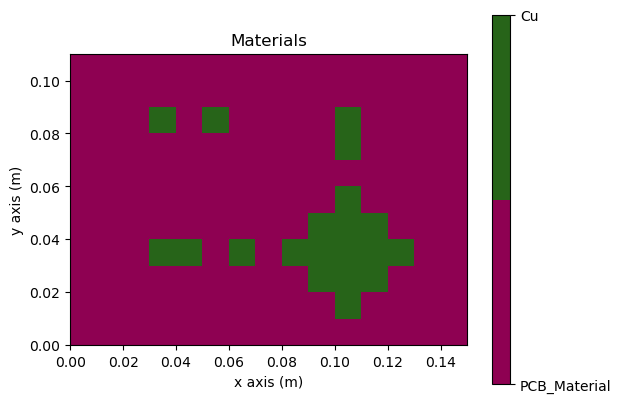

['PCB_Material', 'Cu']


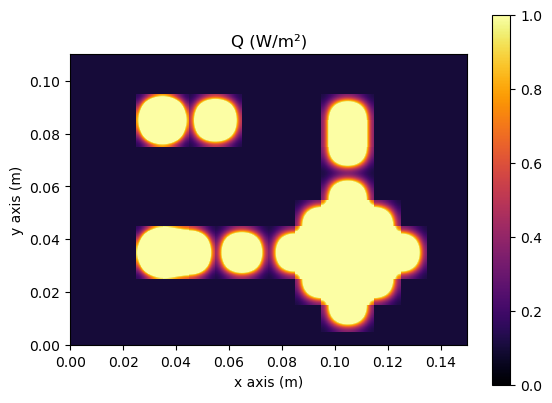

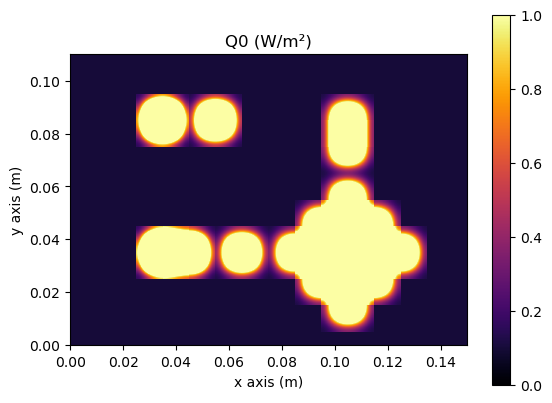

In [14]:
# Check simulation set-up
Project_Example.show_figure(figure_type = 'materials')
Project_Example.show_figure(figure_type = 'Q0')

With the materials and power dissipations set up, we run the heatrapy command to run the simulation. 

In this particular case, we are running the simulation for 100 seconds and recording data every 1 second. 

In this case, heatrapy is running a transient analysis with each of the components running at their specified powers at a constant rate while under the specified boundary conditions - which were the insulated sides.

Finished simulation


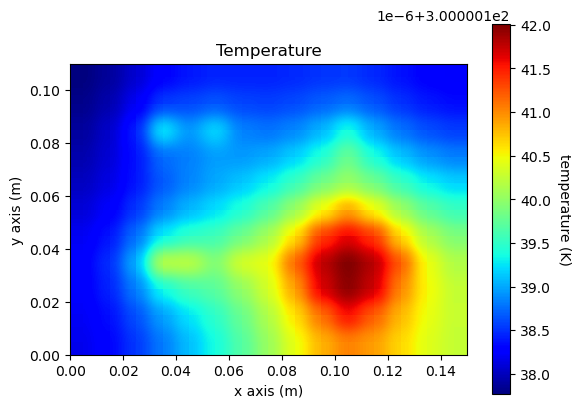

In [15]:
Project_Example.compute(1000, 10, solver='explicit_general')
Project_Example.show_figure('temperature')

Once the simulation is complete, a temperature plot of the PCB board is generated - which will then lead to us calculating the temperature margins of each component. This will then tell us how effective the heatsinks were in cooling the components while active. 

Results